# 11. 울트라마라톤

저번 과제였던 마라톤 문제에 이어 이번 과제도 마라톤 관련 문제가 나왔습니다. 저번 과제에서 결국 테스트 케이스 절반도 못 풀었던 것이 치욕스러워 자료구조 책을 옆에 끼고 도전해봤습니다. 

덕분에 정말 배우는 게 많았습니다. 이론적으로 트리 형태라고 해도 실제 구현은 큐와 스택을 통해서 할 수 있다는 점, BFS와 DFS를 적절하게 섞으면 실행 시간을 크게 줄일 수 있다는 점, 오로지 실행 시간 측면에서는 글로벌 변수도 괜찮을 수도 있다는 점 등등...알고리즘 수업을 듣길 잘 했다는 생각이 들은 과제였습니다.

## 문제

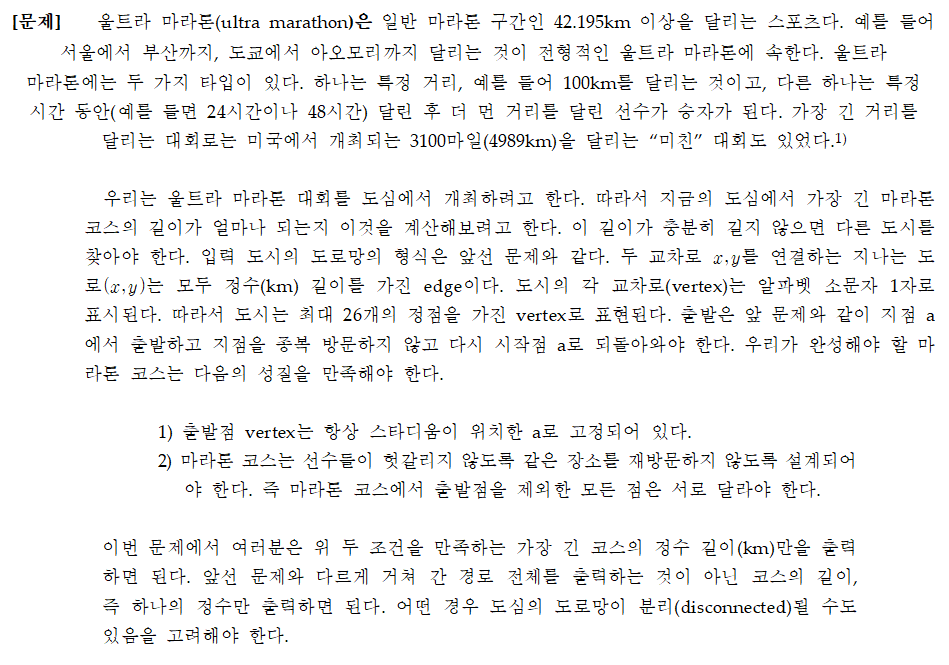

## 입출력

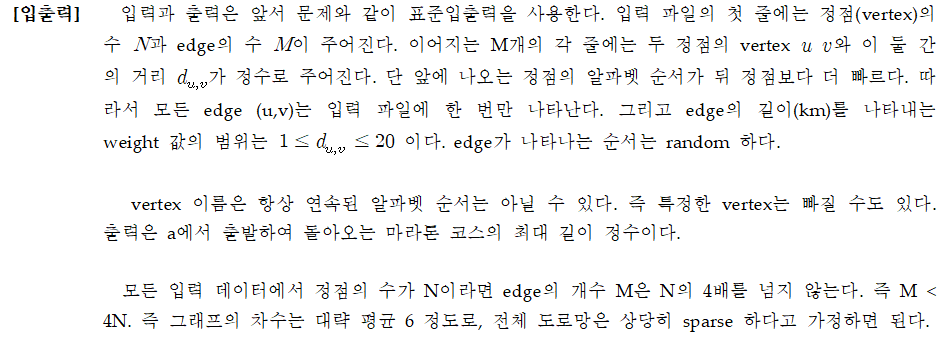

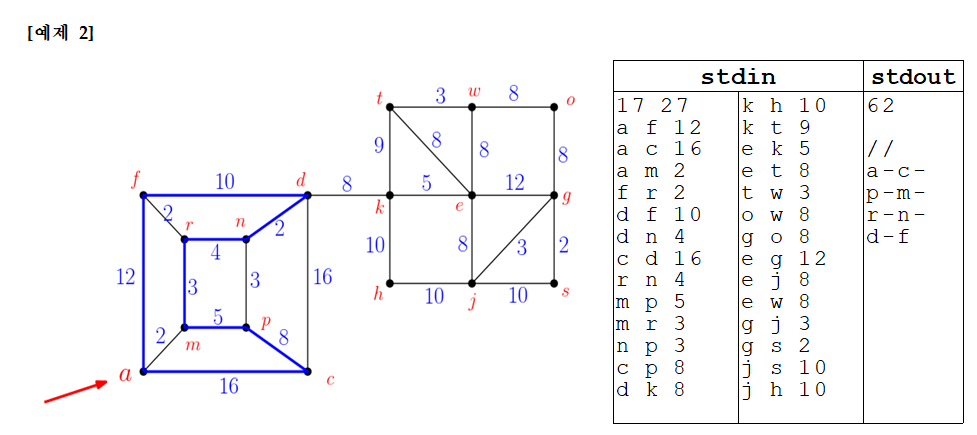

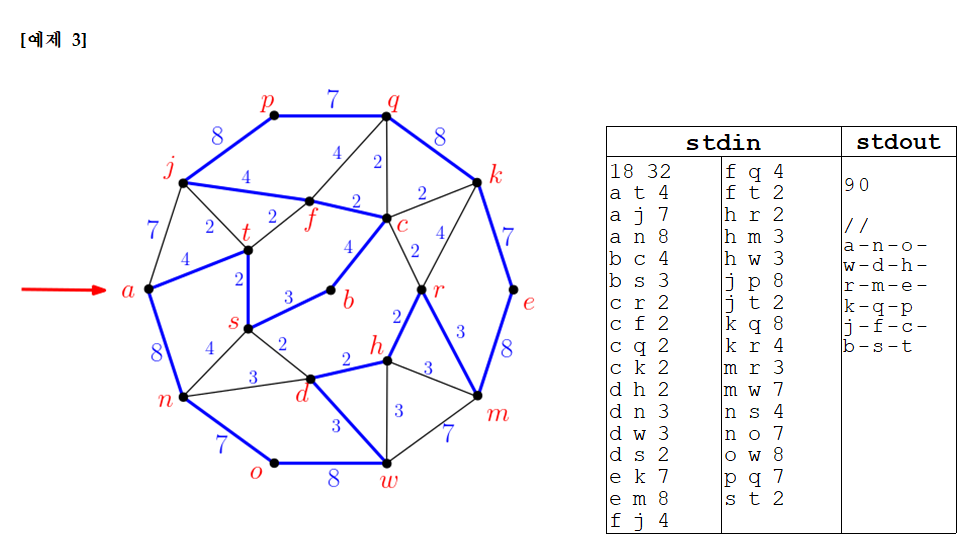

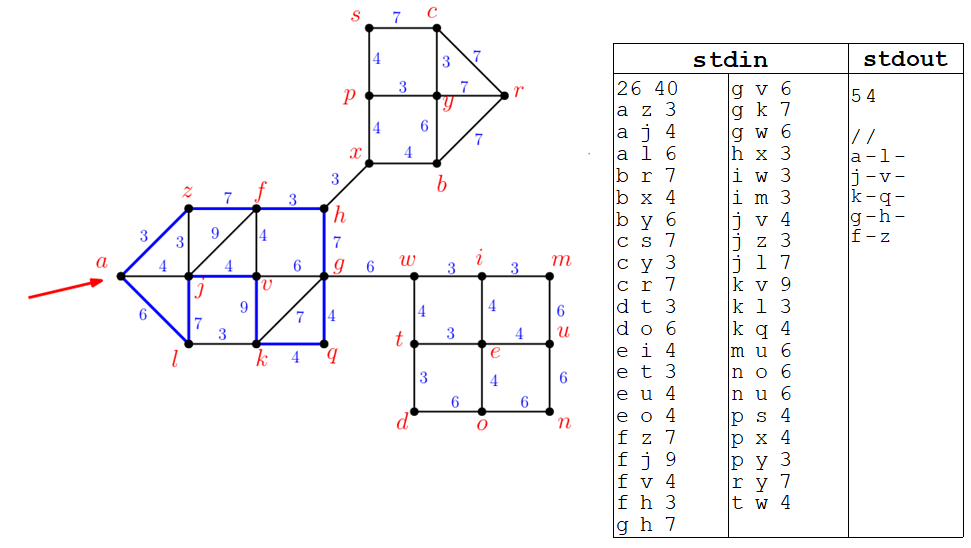

## 기본 세팅

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True) # gdrive 수정 가능하게 함 

Mounted at /content/drive/


In [2]:
# 수정
add = "_11_울트라마라톤(BackTracking)/"

PROJECT_DIR = "/content/drive/MyDrive/2022년/1학기/Computer_Algorithm/과제 파일/" + add

def inp_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.inp'

def out_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.out'

In [ ]:
def test():
  for i in range(1, 6):
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()
      
    node_count = int(input[0].split()[0])
    class_ = Stack(node_count)

    out_path = out_pth(i)
    with open(out_path) as out:
      answer = out.read()
    
    class_.input(input[1:])

    class_.out()
    print(f"(answer)\n{answer}")


In [ ]:
import numpy as np

## 풀이

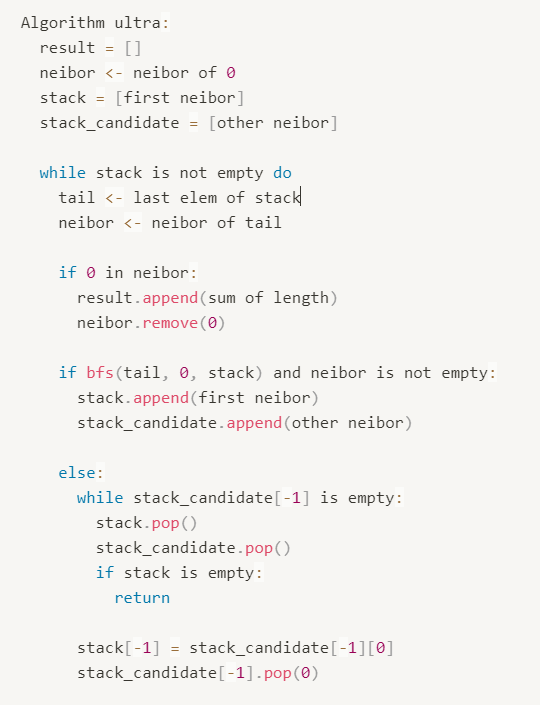

경로 문제의 특성상 탐색 공간이 매우 넓어서 무식한 방법을 사용하면 실행시간이 크게 늘어납니다. 따라서 적절하게 탐색 공간을 줄여야 하는데, BFS가 그 방법이 될 수 있습니다.

BFS를 통해 현재 지나쳐온 노드들을 지나지 않고, Vertex 0로 돌아갈 수 있는지 빠르게 확인합니다. 만약 돌아갈 수 없다면, 더 이상 탐색할 이유가 없으므로 탐색을 종료합니다.

이 방법으로 15개의 테스트 케이스 중 13개는 풀 수 있었지만, 남은 두 가지는 끝내 실행 시간을 맞추지 못 했습니다. 이 부분은 어떻게 해결할 수 있는지 나중에 해법을 찾아보고 싶습니다.

In [3]:
import numpy as np

class Graph:
  def __init__(self, node_count):
    self.graph = np.zeros([node_count, node_count])
    self.char_int = {}
    self.i = 0

  def assign_char_to_int(self, char):
    if not char in self.char_int.keys():
      self.char_int[char] = self.i
      self.i += 1

  def int_to_char(self, num):
    for key, value in self.char_int.items():
         if num == value:
             return key

  def input(self, inp):
    for i in inp: self.add_edge(i)
  

  def add_edge(self, inp):
    if len(inp) != 0:
      inp = inp.split()
      self.assign_char_to_int(inp[0])
      self.assign_char_to_int(inp[1])

      node1 = self.char_int[inp[0]]
      node2 = self.char_int[inp[1]]                         
      length = int(inp[2])

      self.graph[node1, node2] = self.graph[node2, node1] = length

      
  def get_edge_list(self, num):
    row = np.where(self.graph[num, :] > 0)[0]
    return list(row)

  
  def at(self, i, j):
    return self.graph[i,j]

In [4]:
class Stack:
  def __init__(self, node_count):
    self.graph = Graph(node_count)
    self.stack = []
  

  def input(self, inp):
    self.graph.input(inp)


  def dfs(self):
    self.result = []
    stack_candidate = [self.graph.get_edge_list(0)[1:]]
    stack = [self.graph.get_edge_list(0)[0]]

    while len(stack) > 0:
      tail = stack[-1]
      neiborhood = list(set(self.graph.get_edge_list(tail)) - set(stack))

      if 0 in neiborhood:
        neiborhood.remove(0)
        self.result.append(self.count([0] + stack + [0]))

      if len(neiborhood) > 0 and self.bfs(tail, 0, stack): 
        stack.append(neiborhood[0])
        stack_candidate.append(neiborhood[1:])

      else:
        while len(stack_candidate[-1]) == 0:
          stack.pop()
          stack_candidate.pop()

          if len(stack) == 0: 
            return
        
        stack[-1] = stack_candidate[-1][0]
        stack_candidate[-1].pop(0)

  def bfs(self, node1, node2, trace):
    trace = trace.copy()

    queue = list(set(self.graph.get_edge_list(node1)) - set(trace))

    if node2 in queue:
      return True
      
    trace = trace + queue

    while len(queue) > 0:
      neiborhood = self.graph.get_edge_list(queue[0])

      if node2 in neiborhood:
        return True

      for n in neiborhood:
        if not n in trace:
          queue.append(n)
          trace.append(n)

      queue.pop(0)
    
    return False

  def out(self):
    self.dfs()
    if len(self.result) == 0:
      print("None")
    else:
      print(int(max(self.result)))
    

  def count(self, trace):
    tot = 0

    for i in range(len(trace) - 1):
      tot += self.graph.at(trace[i], trace[i+1])

    return tot


In [5]:
def test():
  graphs = []
  
  for i in range(1, 6):
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()
      
    node_count = int(input[0].split()[0])
    class_ = Stack(node_count)

    out_path = out_pth(i)
    with open(out_path) as out:
      answer = out.read()
    
    class_.input(input[1:])

    class_.out()
    print(f"(answer)\n{answer}")

    graphs.append(class_)

  return graphs

In [6]:
graphs = test()

[1]
77
(answer)
77
[2]
61
(answer)
61
[3]
90
(answer)
90
[4]
54
(answer)
54
[5]
99
(answer)
99


In [7]:
graphs[0].bfs(0, 0, [])

True

## 최종 제출 파일

In [ ]:
import numpy as np

class Graph:
  def __init__(self, node_count):
    self.graph = np.zeros([node_count, node_count])
    self.char_int = {}
    self.i = 0

  def assign_char_to_int(self, char):
    if not char in self.char_int.keys():
      self.char_int[char] = self.i
      self.i += 1

  def int_to_char(self, num):
    for key, value in self.char_int.items():
         if num == value:
             return key

  def input(self, inp):
    for i in inp: self.add_edge(i)
  

  def add_edge(self, inp):
    if len(inp) != 0:
      inp = inp.split()
      self.assign_char_to_int(inp[0])
      self.assign_char_to_int(inp[1])

      node1 = self.char_int[inp[0]]
      node2 = self.char_int[inp[1]]                         
      length = int(inp[2])

      self.graph[node1, node2] = self.graph[node2, node1] = length

      
  def get_edge_list(self, num):
    row = np.where(self.graph[num, :] > 0)[0]
    return list(row)

  
  def at(self, i, j):
    return self.graph[i,j]

class Stack:
  def __init__(self, node_count):
    self.graph = Graph(node_count)
    self.stack = []
  

  def input(self, inp):
    self.graph.input(inp)


  def bfs(self, node1, node2, trace):
    trace = trace.copy()

    queue = list(set(self.graph.get_edge_list(node1)) - set(trace))

    if node2 in queue:
      return True
      
    trace = trace + queue

    while len(queue) > 0:
      neiborhood = self.graph.get_edge_list(queue[0])

      if node2 in neiborhood:
        return True

      for n in neiborhood:
        if not n in trace:
          queue.append(n)
          trace.append(n)

      queue.pop(0)
    
    return False
    

  def count(self, trace):
    tot = 0

    for i in range(len(trace) - 1):
      tot += self.graph.at(trace[i], trace[i+1])

    return tot


  def dfs(self, node1 = 0, node2 = 0, stack = [], first = False):
    result = []
    edge_list = list(set(self.graph.get_edge_list(node1)) - set(stack))
    stack_candidate = [edge_list[1:]]
    stack = stack + [edge_list[0]]

    while len(stack) > 0:
      tail = stack[-1]
      neiborhood = list(set(self.graph.get_edge_list(tail)) - set(stack))

      if node2 in neiborhood:
        neiborhood.remove(node2)
        result.append(self.count([node1] + stack + [node2]))

      condition = len(neiborhood) > 0 and self.bfs(tail, 0, stack)

      if first and condition:
        possible_max_length = self.count([node1] + stack) + self.dfs(tail, stack = stack[1:-1])
        condition = condition and (possible_max_length > max(result))

      if condition :
        stack.append(neiborhood[0])
        stack_candidate.append(neiborhood[1:])

      else:
        while len(stack_candidate[-1]) == 0:
          stack.pop()
          stack_candidate.pop()

          if len(stack) == 0 or len(stack_candidate) == 0: 
            return int(max(result))
                  
        stack[-1] = stack_candidate[-1][0]
        stack_candidate[-1].pop(0)
    
    return int(max(result))


  def out(self):
    result = self.dfs(first = True)
    print(result)


inp = input()
inp = list(map(int, inp.split()))

stack = Stack(inp[0])

inp_edges = [input() for _ in range(inp[1])]

stack.input(inp_edges)
stack.out()

## 결과

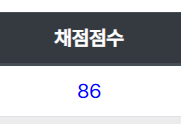